In [233]:
#це додав індус для енкодера(шоб міняти слова на 0,1,2,..(тіпа а, б, а, В = 0, 1, 0, 2))
from sklearn.preprocessing import LabelEncoder
#штучка шоб заповнити всі нан на медіану
from sklearn.impute import SimpleImputer

#torch
import torch
import torch.nn as nn
import torch.optim as optim

#base libs
import sklearn
import numpy as np

#dataset
import pandas as pd
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split as split

#visualization
import missingno as msno
import seaborn as sn
import matplotlib.pyplot as plt

#models
from sklearn.decomposition import PCA
from sklearn.svm import SVC

#metrics
from sklearn.metrics import classification_report, confusion_matrix 

In [234]:
df = pd.read_csv('Titanic-Dataset.csv')

In [235]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [236]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [237]:
df["Survived"].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

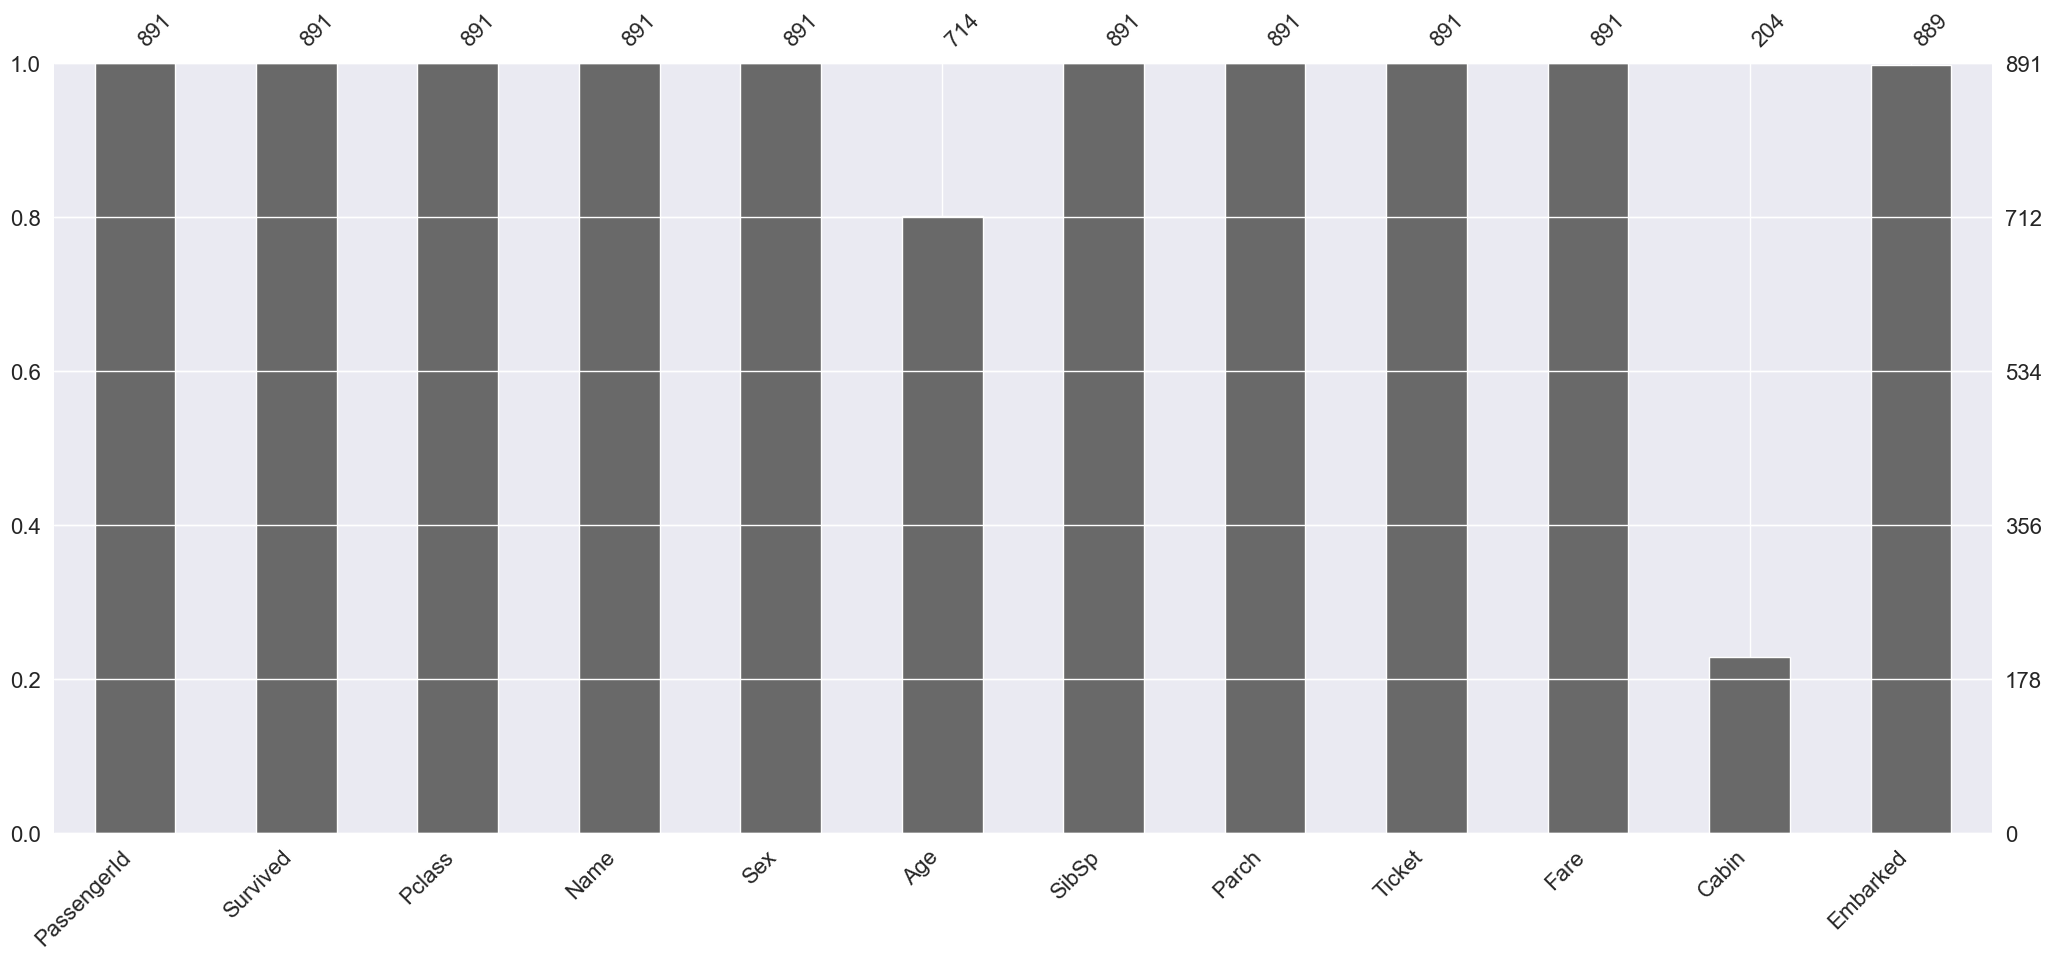

In [239]:
msno.bar(df)

In [240]:
le = LabelEncoder() #це шоб створити енкодер, тіпа він всі слова міняє на 1 чи 0 і тд
df['Sex'] = le.fit_transform(df['Sex'])

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode())#замінив пропуски на моду
df['Embarked'] = le.fit_transform(df['Embarked']) 

df['Cabin'] = df['Cabin'].str[0] #це залишає лише першу букву назви кабіни
df['Cabin'] = le.fit_transform(df['Cabin'])

df['Age']=df['Age'].fillna(df['Age'].median())

In [241]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int64  
 11  Embarked     891 non-null    int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.034212,-0.057527,-0.001652,0.012658,-0.030939,0.013083
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,-0.301116,-0.163517
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,0.746616,0.157112
Sex,0.042939,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,0.123076,0.104057
Age,0.034212,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.255783,-0.014205
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,0.041540,0.066654
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,-0.032548,0.038322
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,-0.523013,-0.221226
Cabin,-0.030939,-0.301116,0.746616,0.123076,-0.255783,0.041540,-0.032548,-0.523013,1.000000,0.187015
Embarked,0.013083,-0.163517,0.157112,0.104057,-0.014205,0.066654,0.038322,-0.221226,0.187015,1.000000


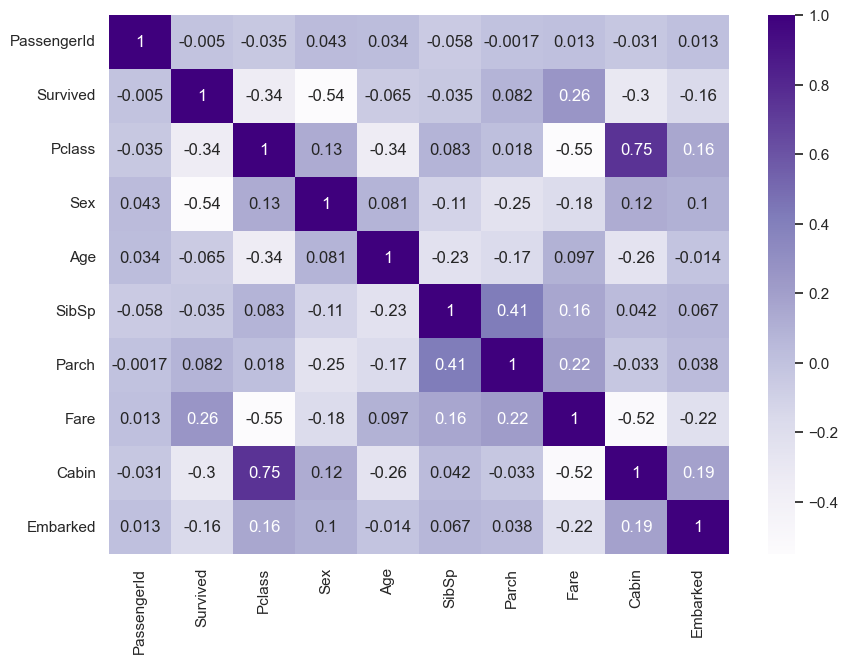

In [243]:
corr = df.select_dtypes(include=["int64", "float64"]).corr()
sn.set(rc = {
    "figure.figsize": (10, 7)
})
sn.heatmap(corr, annot = True, cmap = "Purples")
corr

In [244]:
df.describe(percentiles = [0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99])

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208,6.716049,1.538721
std,257.353842,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,2.460739,0.794231
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,9.900000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,45.500000,0.000000,1.000000,0.000000,6.000000,0.000000,0.000000,7.225000,1.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,8.000000,1.000000
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,8.000000,2.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,8.000000,2.000000
95%,846.500000,1.000000,3.000000,1.000000,54.000000,3.000000,2.000000,112.079150,8.000000,2.000000


In [245]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,8,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,8,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,8,2
5,6,0,3,"Moran, Mr. James",1,28.0,0,0,330877,8.4583,8,1
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,4,2
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,8,2
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,8,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,8,0


In [246]:
df.shape

(891, 12)

In [247]:
minmax = preprocessing.MinMaxScaler()
X = df.drop(columns=["Name", "Ticket", "Survived"])
y = df["Survived"].values

X_sc = minmax.fit_transform(X)
df.describe().loc[["min","max"]].T

,min,max
PassengerId,1.00,891.0000
Survived,0.00,1.0000
Pclass,1.00,3.0000
Sex,0.00,1.0000
Age,0.42,80.0000
SibSp,0.00,8.0000
Parch,0.00,6.0000
Fare,0.00,512.3292
Cabin,0.00,8.0000
Embarked,0.00,3.0000


In [248]:
pca = PCA()
pca.fit(X_sc)

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [249]:
pca_range = np.arange(1, X_sc.shape[1] + 1)
pca_range

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [250]:
X_train, x_test, y_train, y_test = split(X, y, test_size = 0.25, shuffle = True, random_state = 11)
scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
x_test = scaler.transform(x_test)

model = SVC()
model.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [251]:
predictions = model.predict(x_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0])

In [252]:
# Weather Survived or not: 0 = No, 1 = Yes

In [253]:
y_test

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0])

In [254]:
print(classification_report(y_test, predictions, digits = 2))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       147
           1       0.87      0.63      0.73        76

    accuracy                           0.84       223
   macro avg       0.85      0.79      0.81       223
weighted avg       0.85      0.84      0.84       223



In [255]:
torch.manual_seed(1)

In [256]:
devise = "cpu"

In [257]:
X_train.shape

(668, 9)

In [258]:
X_train_tensor = torch.tensor(X_train, dtype = torch.float32)
x_test_tensor = torch.tensor(x_test, dtype = torch.float32)
y_train_tensor = torch.tensor(y_train)
y_test_tensor = torch.tensor(y_test)

In [259]:
model = nn.Sequential(
    nn.Linear(9, 6), 
)

In [260]:
criterion =  nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.005)

In [261]:
train_shape = X_train_tensor.shape[0]
train_shape

668

In [262]:
B_s = 300
epohs = 20
for epoh in range(1, epohs + 1):
    model.train()
    running_loss = 0
    X_train_tensor =X_train_tensor[torch.randperm(train_shape)]
    for start in range(0, train_shape, B_s):
        xb = X_train_tensor[start : start + B_s]
        yb = y_train_tensor[start : start + B_s]
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        print(epoh, start, loss.item())
        

1 0 1.5634818077087402
1 300 1.5308406352996826
1 600 1.4856351613998413
2 0 1.4833799600601196
2 300 1.4450918436050415
2 600 1.429793119430542
3 0 1.401807188987732
3 300 1.3753269910812378
3 600 1.3565717935562134
4 0 1.3345166444778442
4 300 1.3155200481414795
4 600 1.3062677383422852
5 0 1.2710717916488647
5 300 1.2558199167251587
5 600 1.2152711153030396
6 0 1.2032418251037598
6 300 1.2045811414718628
6 600 1.1939091682434082
7 0 1.172181487083435
7 300 1.1472212076187134
7 600 1.124609351158142
8 0 1.119067907333374
8 300 1.096121907234192
8 600 1.1005662679672241
9 0 1.0960601568222046
9 300 1.0627756118774414
9 600 1.058601975440979
10 0 1.0468693971633911
10 300 1.0251325368881226
10 600 1.0284390449523926
11 0 1.010105848312378
11 300 1.0006681680679321
11 600 1.0052598714828491
12 0 0.9880817532539368
12 300 0.9707913398742676
12 600 0.968720018863678
13 0 0.9649194478988647
13 300 0.9516398310661316
13 600 0.9534019231796265
14 0 0.9406927227973938
14 300 0.924683153629303

In [263]:
model.eval()

Sequential(
  (0): Linear(in_features=9, out_features=6, bias=True)
)

In [264]:
with torch.no_grad():
    preds = model(x_test_tensor)

preds

tensor([[ 1.6216,  1.3798, -0.7990, -1.9259, -0.9259, -1.0041],
        [ 1.9905,  1.6495, -1.0845, -1.9812, -0.9995, -1.1243],
        [ 1.8090,  1.5448, -1.0888, -1.8367, -0.8794, -1.0080],
        ...,
        [ 1.8087,  1.5552, -1.0710, -1.9479, -0.9901, -1.0744],
        [ 2.0191,  1.6945, -1.1858, -2.0041, -1.0915, -1.1863],
        [ 1.9933,  1.6778, -1.2395, -1.9802, -1.0984, -1.2704]])

In [265]:
preds_argmax = preds.argmax(axis = 1)
confusion_matrix(y_test_tensor, preds_argmax)

array([[147,   0],
       [ 76,   0]])

In [266]:
print(classification_report(y_test_tensor, preds_argmax, digits = 2))

              precision    recall  f1-score   support

           0       0.66      1.00      0.79       147
           1       0.00      0.00      0.00        76

    accuracy                           0.66       223
   macro avg       0.33      0.50      0.40       223
weighted avg       0.43      0.66      0.52       223



C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave